In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
points = np.array([[2,5],[4,4],[3,2],[3,-1],[1,-3],[-1,-3],[-3,-1],[-3,2],[-4,4],[-2,5],[-1,4],[1,4]])

# Stack the points array with a column of ones to the right of the array, resulting in a new array with shape (12,3)
points_h=np.hstack((points, np.ones((points.shape[0],1))))

# Transpose the array to get a shape of (3,12)
points_h_t=points_h.T

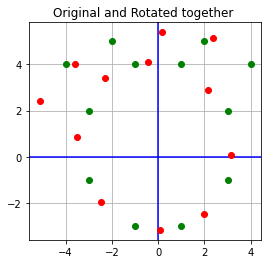

In [9]:
# Convert an angle of 20 degrees to radians
theta= 20 * np.pi / 180

# Create a rotation matrix using the angle in radians
R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta),np.cos(theta), 0],
              [0, 0, 1]])

# Rotate the points by applying the rotation matrix
rotated=np.dot(R,points_h_t).T

fig, ax = plt.subplots(1)

ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')
ax.plot(points[:, 0], points[:, 1], 'go')

plt.title('Original and Rotated together ')
plt.plot(rotated[:, 0], rotated[:, 1], 'ro')
plt.show()

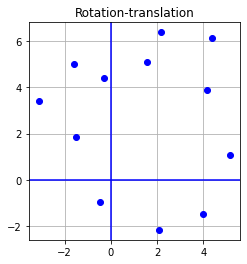

In [10]:
# Create a transformation matrix
T = np.array([[1, 0, 2],
              [0, 1, 1],
              [0, 0, 1]])

# Transform the points by applying the rotation matrix and the transformation matrix
transformed = np.dot(T, np.dot(R, points_h_t)).T

fig, ax = plt.subplots(1)

ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')
plt.title('Rotation-translation')

plt.plot(transformed [:, 0], transformed [:, 1], 'bo')
plt.show()

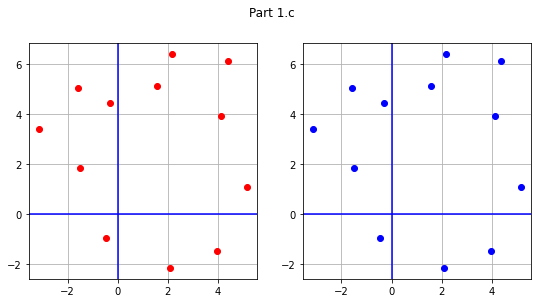

In [11]:
#T_R=T*R
T_R= np.array([[np.cos(theta), -np.sin(theta), 2],
              [np.sin(theta), np.cos(theta), 1],
              [0, 0, 1]])


tr_points = np.dot(T_R , points_h_t).T
fig, ax = plt.subplots(ncols=2, figsize=(9, 4.5))
fig.suptitle('Part 1.c')
ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')


ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')

ax[0].plot(transformed[:, 0], transformed[:, 1], 'ro')

ax[1].plot(tr_points[:,0],tr_points[:,1],'bo')
plt.show()

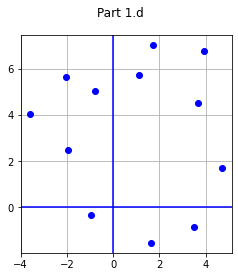

In [12]:
#R_T=R*T

# Create a rotation-translation matrix
R_T=np.array([[np.cos(theta), -np.sin(theta), 2*np.cos(theta)-np.sin(theta)],
              [np.sin(theta), np.cos(theta), 2*np.sin(theta)+np.cos(theta)],
              [0, 0, 1]])

# Transform and rotate the points using the rotation-translation matrix
rt_points = np.dot(R_T , points_h_t).T
fig, ax = plt.subplots(1)

fig.suptitle('Part 1.d')
ax.clear()
ax.grid(True)
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')
ax.set_aspect('equal')

ax.plot(rt_points[:,0],rt_points[:,1],'bo')
plt.show()

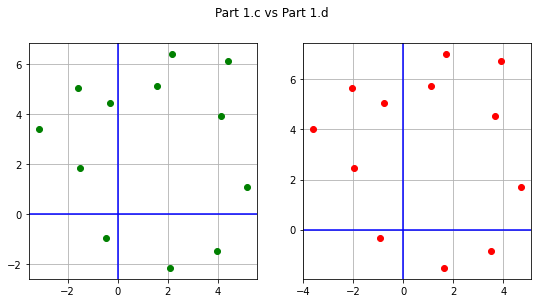

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4.5))
fig.suptitle('Part 1.c vs Part 1.d')

ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')

ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')

ax[0].plot(tr_points[:, 0], tr_points[:, 1], 'go')

ax[1].plot(rt_points[:,0],rt_points[:,1],'ro')
plt.show()

Matrix multiplication is not commutative, meaning that the order in which matrices are multiplied matters. As a result, the matrices obtained in (c) and (d) are not the same. There are also slight differences in the T matrices used in the operations, which contribute to the matrices being different from each other.

----PART 2----

In [14]:
from skimage.io import imread
from skimage.color import rgb2gray
import cv2 as cv
import matplotlib.pyplot as plt


# load an image to warp
img = imread("https://raw.githubusercontent.com/cvrg-iyte/cvrg-iyte.github.io/master/assets/img/img2warp.jpg")

In [15]:
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
yv, xv = np.meshgrid(i, j)
numpoints = xv.ravel().shape[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


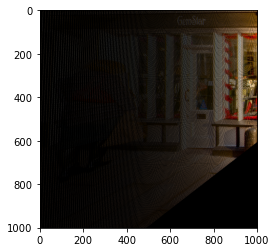

In [16]:
r = img[yv.ravel(),xv.ravel(),0]
g = img[yv.ravel(),xv.ravel(),1]
b = img[yv.ravel(),xv.ravel(),2]

# Define Homography matrix 
H=np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
            [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
            [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

x_cord = xv.ravel().reshape((1,numpoints))
y_cord = yv.ravel().reshape((1,numpoints))

grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

grid2 = np.dot(H,grid)

grid2H = np.empty_like(grid2)

grid2H[0,:] = grid2[0,:] / grid2[2,:]
grid2H[1,:] = grid2[1,:] / grid2[2,:]

grid3 = np.round(grid2H).astype(int)

warped = -np.ones((1001,1001,3)).astype(np.int16)

validsX=np.bitwise_and(grid3[0,:]>=0,grid3[0,:]<1000)
validsY=np.bitwise_and(grid3[1,:]>=0,grid3[1,:]<1000)
valids = np.bitwise_and(validsX,validsY)

warped[grid3[1,valids].astype(int),grid3[0,valids].astype(int),0]=r[valids]

warped[grid3[1,valids].astype(int),grid3[0,valids].astype(int),1]=g[valids]
warped[grid3[1,valids].astype(int),grid3[0,valids].astype(int),2]=b[valids]

plt.imshow(warped)
plt.show()

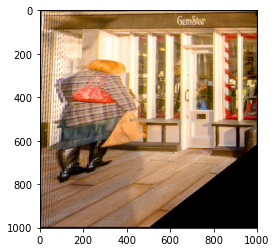

In [17]:
warped2 = np.zeros((1001,1001,3)).astype(np.uint8)
# Area where we look for closest valid assignation
area2check=5

# loop over the valid area of the warped image
for i in range(area2check,warped.shape[0]-area2check):
    for j in range(area2check,warped.shape[1]-area2check):
        # check if the pixel has a valid warped value        
        if warped[i,j,0]==-1:  #need to look for neighbor
            distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check
            
            # loop over all the possible neighbors
            for k in range(i-area2check,i+area2check):
                for l in range(j-area2check,j+area2check):
                    distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                    if warped[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                        distance=distancetested
                        warped2[i,j]=warped[k,l]
        else:  #assign the valid warping
            warped2[i,j] =warped[i,j]
            

plt.imshow(warped2)
plt.show()

The interpolated image will generally look similar to the initially warped image, but with lower resolution due to resizing. One main difference is that the interpolated image will have pixelated, blocky edges because it uses nearest neighbor interpolation, which is less precise than methods like bilinear or bicubic interpolation. Overall, the interpolated image will be of lower quality compared to the initially warped image because the interpolation process introduces distortions and reduces the image's detail. However, nearest neighbor interpolation is faster and easier to implement than other methods, which can be useful in situations where performance is a priority.